# HiRES GPT Model

In [1]:
from gpt import GPT
from distgen import Generator

%config InlineBackend.figure_format = 'retina' # Better looking plots

In [2]:
# Useful for debugging
# %load_ext autoreload
# %autoreload 2

## Original v0

This is the original model, with the beam defined in the input file

In [3]:
G0 = GPT('v0/gpt.in', verbose=True)

GPT.configure_gpt:
   Original input file "gpt.in" in "/Users/chrisonian/Code/GitHub/hires-lattice/gpt/models/hires/v0"
   Configured to run in "/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpv0rf07kc"


In [4]:
# LUME-GPT identifies these automatically
G0.input['variables']

{'nps': 2000.0,
 'Spotsize': 7e-05,
 'Ratio': 1.0,
 'DistAngle': 0.0,
 'MTE': 0.3,
 'ztime': 3e-12,
 'gunFac': 0.973,
 'phi': -9.0,
 'Qtot': 0.0,
 'rDepthOpt': 18.0,
 'scurr1': 4.7,
 'Sol1Q1CurrMult': -0.6,
 'Sol1SQ1CurrMult': -0.25,
 'Sol1Q2CurrMult': 0.6,
 'Sol1SQ2CurrMult': 0.25,
 'Q1CurrAdd': 0.0,
 'Q2CurrAdd': 0.0,
 'SQ1CurrAdd': 0.0,
 'SQ2CurrAdd': 0.0,
 'sol1CorrectFac': 1.01,
 'Eb': 0.0,
 'phi2': -101.6,
 'scurr2': 0.0,
 'Sol2Q1CurrMult': 0.6,
 'Sol2SQ1CurrMult': 0.25,
 'Sol2Q2CurrMult': -0.6,
 'Sol2SQ2CurrMult': -0.25,
 'sol2CorrectFac': 1.01,
 'qcurr1': 5.53,
 'qcurr2': -6.68,
 'qcurr3': 5.53,
 'qcurr4': 0.0,
 'qcurr5': 0.0,
 'qcurr6': 0.0,
 'bquad': 197.6,
 'dip1curr': 5.19925,
 'Dip1d1': 0.0,
 'Dip1b1': 69.1438,
 'Dip1b2': 0.0,
 'dip1AngleDelta1': 0.0,
 'dip1AngleDelta2': 0.0,
 'dip2curr': 5.1473,
 'Dip2d1': 0.0,
 'Dip2b1': 69.1438,
 'Dip2b2': 0.0,
 'dip2AngleDelta1': 0.0,
 'dip2AngleDelta2': 0.0,
 'pinhole1': 1.0,
 'Ra1': 0.00025,
 'SCam2': 0.0,
 'UCam1': 0.0,
 'sampleCam'

In [5]:
# Change something
G0.input['variables']['nps'] = 1000

In [6]:
%%time
G0.run()

GPT.run_gpt:
   Running GPT...
   Writing gpt input file to "/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpv0rf07kc/gpt.in"
   Running with timeout = None sec.
   Loading GPT data from /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpv0rf07kc/gpt.out.gdf
   GDF data loaded, time ellapsed: 0.271049 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run finished, total time ellapsed: 64.236 (sec)
CPU times: user 916 ms, sys: 333 ms, total: 1.25 s
Wall time: 1min 4s


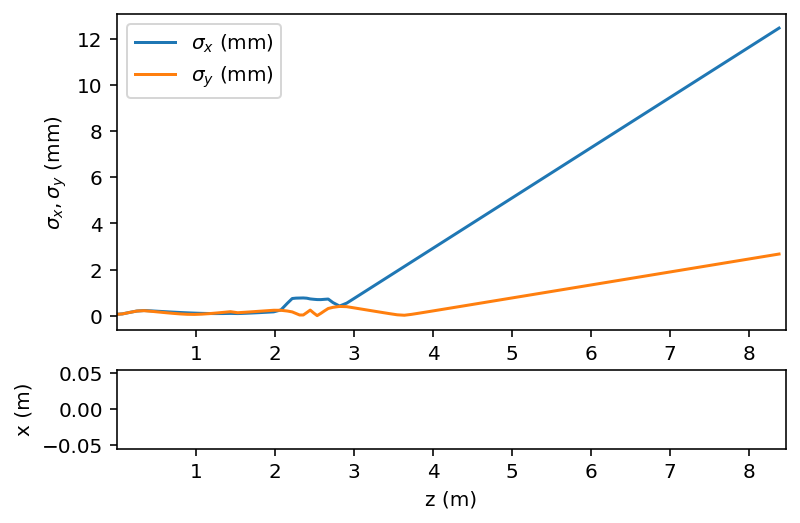

In [7]:
G0.plot(['sigma_x', 'sigma_y'])

In [8]:
# patch for old openPMD-beamphysics
#from pmd_beamphysics.units import PARTICLEGROUP_UNITS
#PARTICLEGROUP_UNITS['n_particle'] = PARTICLEGROUP_UNITS['status']

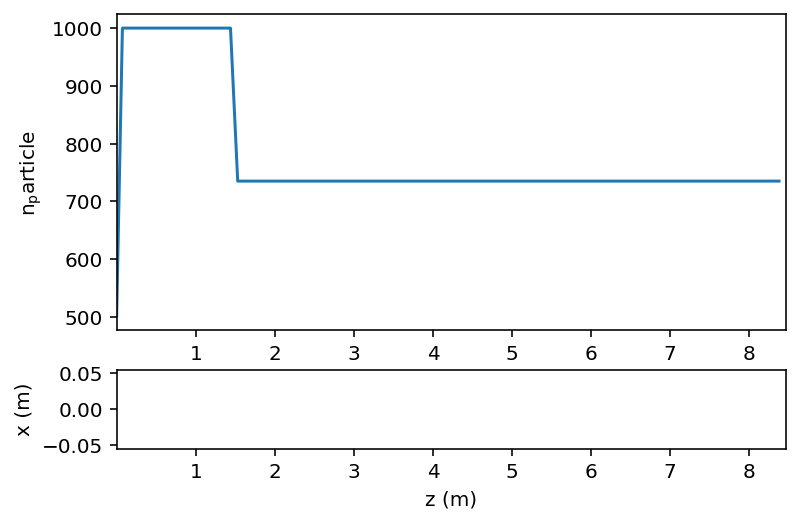

In [9]:
# Some particles are lost
G0.plot('n_particle')

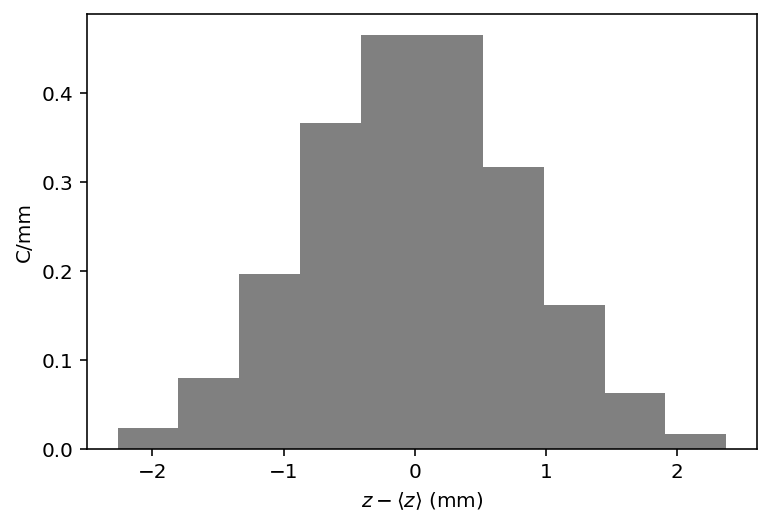

In [10]:
# Initial particles (take after one step)
P0 = G0.particles[1]
P0.plot('delta_z')

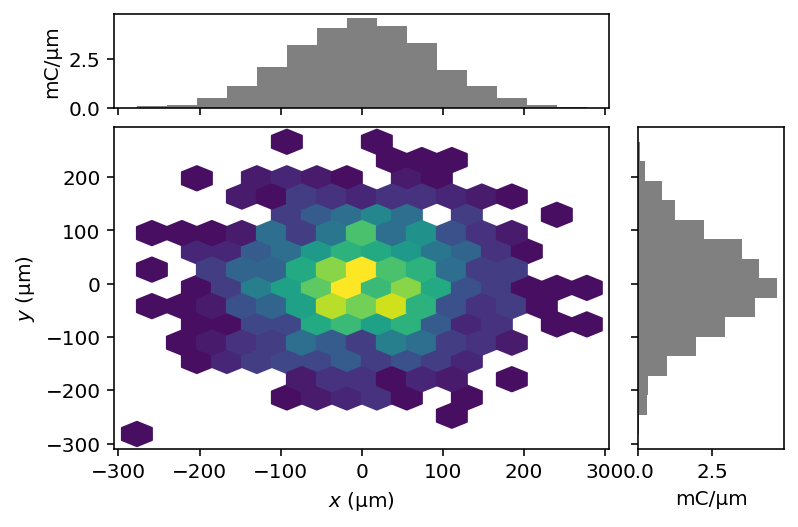

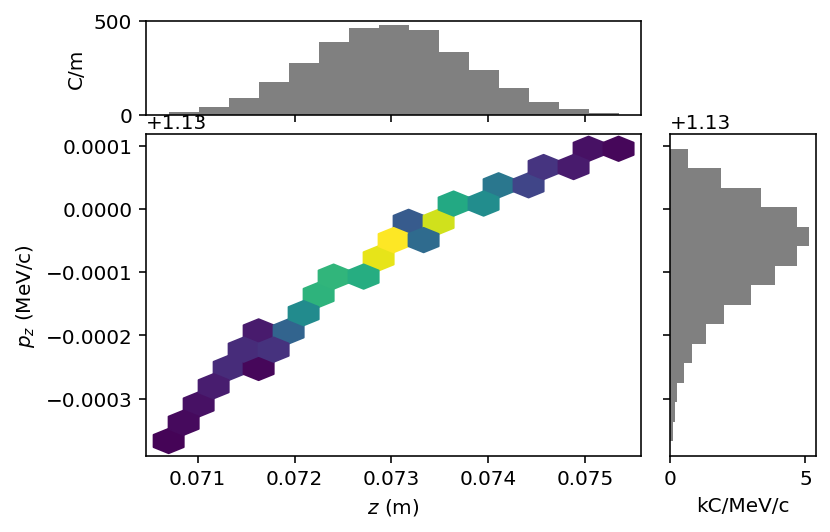

In [11]:

P0.plot('x', 'y')
P0.plot('z', 'pz')

## V1 with particles from Distgen

`v1` removes beam definitions from the input file. Instead, we will have Distgen make the particles.

In [12]:
D = Generator('v1/distgen.yaml')
D['n_particle'] = 1001
P1 = D.run()
P1

<ParticleGroup with 1001 particles at 0x11c1a0160>

In [13]:
%%time
G1 = GPT('v1/gpt.in', initial_particles=P1)
G1.run()

CPU times: user 954 ms, sys: 350 ms, total: 1.3 s
Wall time: 1min 8s


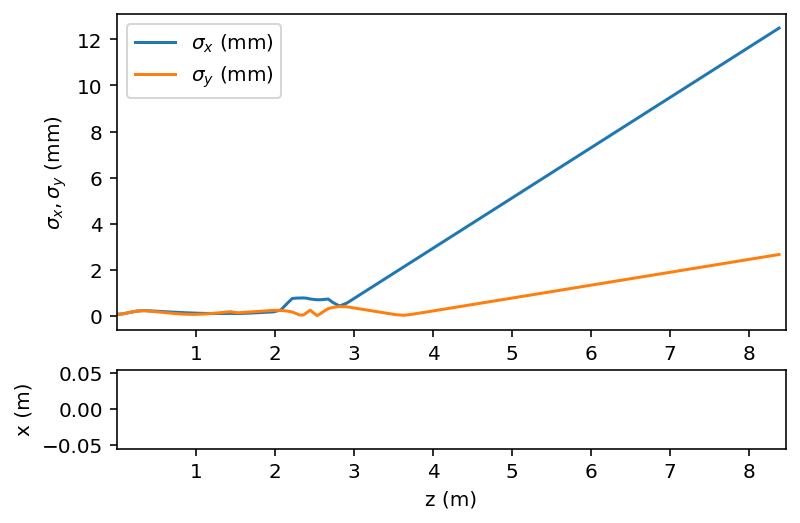

In [14]:
G1.plot(['sigma_x', 'sigma_y'])

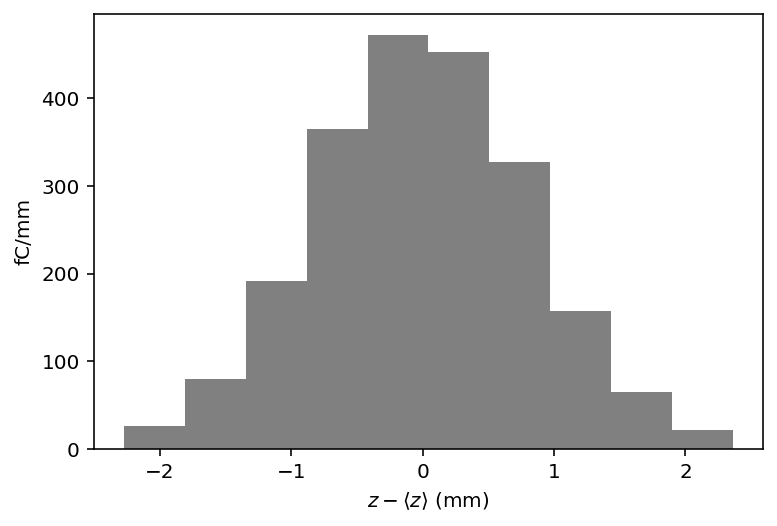

In [15]:
G1.particles[1].plot('delta_z')

## Traces

Trace three particles to get a feel for the system.

In [16]:
from pmd_beamphysics import single_particle
from scipy.constants import c
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Initial particles
dx = 100e-6
P0 = single_particle(x=0) + single_particle(x=-dx) + single_particle(x=dx)

In [18]:
G = GPT('v1/gpt.in', initial_particles=P0)
V = G.input['variables']
V0 = V.copy() # for reference
V.keys()

dict_keys(['gunFac', 'phi', 'scurr1', 'Sol1Q1CurrMult', 'Sol1SQ1CurrMult', 'Sol1Q2CurrMult', 'Sol1SQ2CurrMult', 'Q1CurrAdd', 'Q2CurrAdd', 'SQ1CurrAdd', 'SQ2CurrAdd', 'sol1CorrectFac', 'Eb', 'phi2', 'scurr2', 'Sol2Q1CurrMult', 'Sol2SQ1CurrMult', 'Sol2Q2CurrMult', 'Sol2SQ2CurrMult', 'sol2CorrectFac', 'qcurr1', 'qcurr2', 'qcurr3', 'qcurr4', 'qcurr5', 'qcurr6', 'bquad', 'dip1curr', 'Dip1d1', 'Dip1b1', 'Dip1b2', 'dip1AngleDelta1', 'dip1AngleDelta2', 'dip2curr', 'Dip2d1', 'Dip2b1', 'Dip2b2', 'dip2AngleDelta1', 'dip2AngleDelta2', 'pinhole1', 'Ra1', 'SCam2', 'UCam1', 'sampleCam', 'detectorCam', 'tall', 'sec2', 'sec3', 'frf', 'Eg', 'bDist', 'frf2', 'Zsol1', 'R', 'L', 'tmax', 'Zsol2', 'arclength', 'angle', 'zdipole1', 'z1stquad', 'z2ndquad', 'z3rdquad', 'Lquad', 'zdipole2', 'z4thquad', 'z5thquad', 'z6thquad', 'Ntout'])

In [19]:
# Add extra tout
V['Ntout'] = 1000

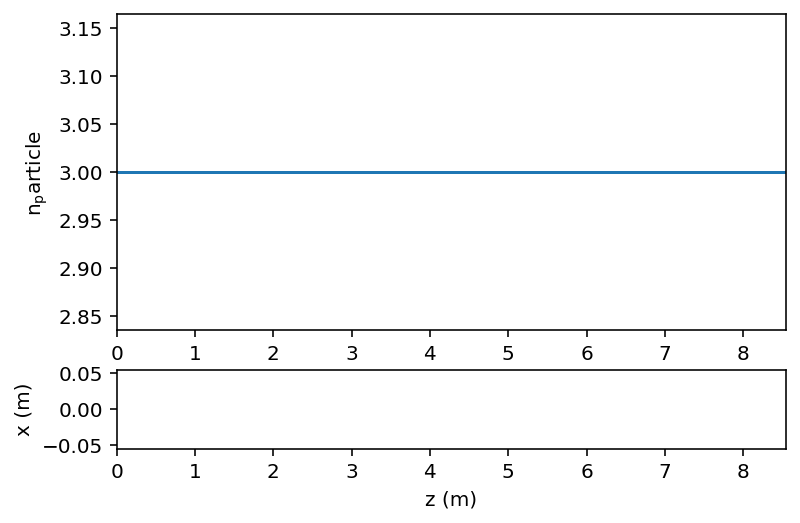

In [20]:
# Check that no particles are lost
G.run()
G.plot('n_particle')

Text(0.5, 1.0, 'Global frame')

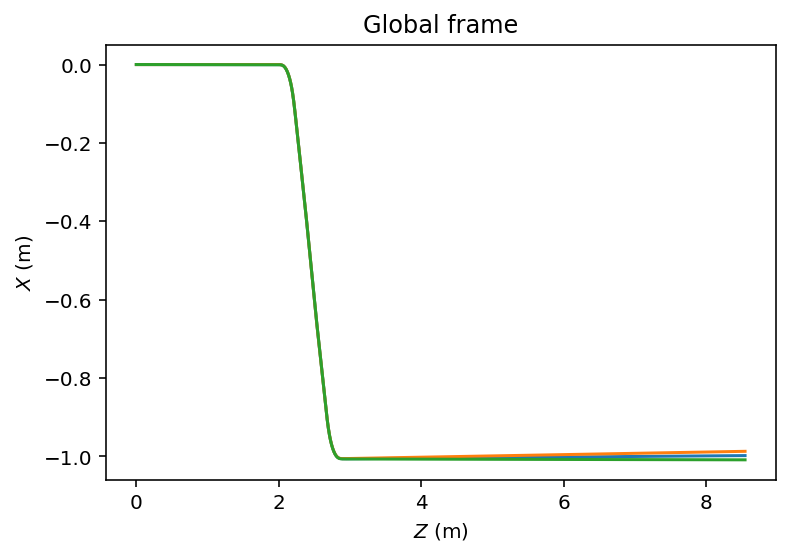

In [21]:
# Simple function to get coordinate arrays
def coord(key):
    return np.array([P[key] for P in G.tout])

# Simple function to get coordinate arrays in the centroid frame
def coord2(key):
    return np.array([P[key] for P in G.tout_ccs])


plt.plot(coord('z'), coord('x'))
plt.xlabel(r'$Z$ (m)')
plt.ylabel(r'$X$ (m)')
plt.title('Global frame')

Text(0.5, 1.0, 'ccs (centroid) frame')

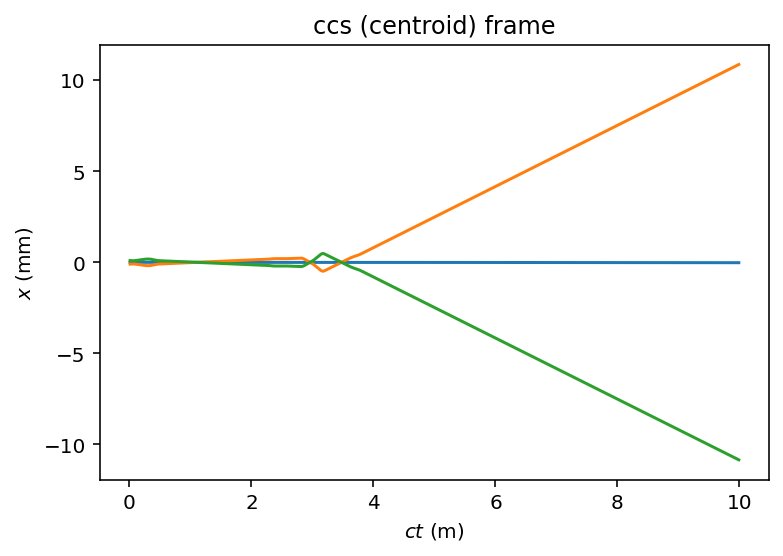

In [38]:
fig, ax = plt.subplots()
ax.plot(c*coord2('t'), 1000*coord2('x'))

ax.set_xlabel(r'$ct$ (m)')
ax.set_ylabel(r'$x$ (mm)')
plt.title('ccs (centroid) frame')

## Interactive widget`

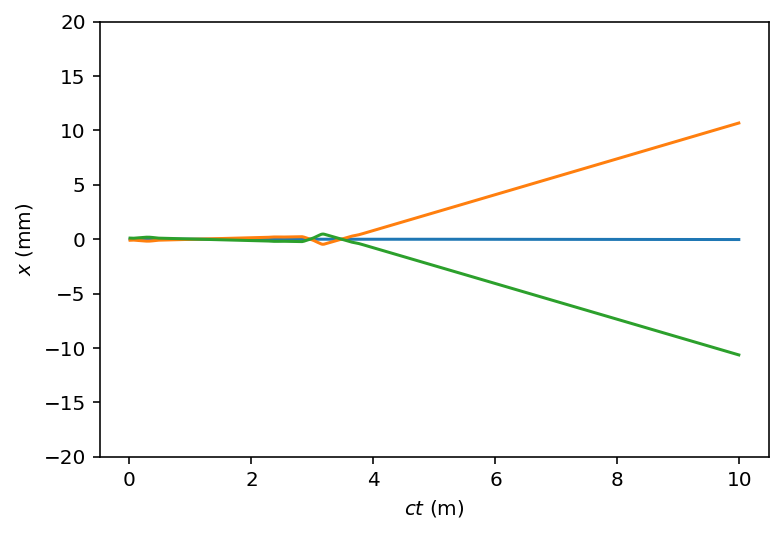

In [23]:
# Make a function to control some things and then plot

def f(qcurr1=V0['qcurr1'], qcurr2=V0['qcurr2'], qcurr3=V0['qcurr3']):
    V['qcurr1'] = qcurr1
    V['qcurr2'] = qcurr2
    V['qcurr3'] = qcurr3
    G.run()
    fig, ax = plt.subplots()
    ax.plot(c*coord2('t'), 1000*coord2('x'))
    
    ax.set_xlabel(r'$ct$ (m)')
    ax.set_ylabel(r'$x$ (mm)')
    ax.set_ylim(-20, 20)
    
f(qcurr2 = -6.68 *0.9)

In [24]:
from ipywidgets import interact

In [25]:
# Move the sliders. Wait a couple seconds for the plot to refresh.
interact(f)

interactive(children=(FloatSlider(value=5.53, description='qcurr1', max=16.59, min=-5.53), FloatSlider(value=-…

<function __main__.f(qcurr1=5.53, qcurr2=-6.68, qcurr3=5.53)>

# `evaluate` function

This is a high-level function to produce a flat dict of outputs, which is useful for making datasets and doing optimizations.

In [26]:
from gpt import evaluate_gpt_with_distgen
?evaluate_gpt_with_distgen

Signature:
evaluate_gpt_with_distgen(
    settings,
    archive_path=None,
    merit_f=None,
    gpt_input_file=None,
    distgen_input_file=None,
    workdir=None,
    use_tempdir=True,
    gpt_bin='$GPT_BIN',
    timeout=2500,
    auto_phase=False,
    verbose=False,
    gpt_verbose=False,
    asci2gdf_bin='$ASCI2GDF_BIN',
    kill_msgs=['gpt: Spacecharge3Dmesh:', 'Error:', 'gpt: No valid GPT license', 'malloc', 'Segmentation fault'],
)
Docstring:
Simple evaluate GPT.

Similar to run_astra_with_distgen, but returns a flat dict of outputs. 

Will raise an exception if there is an error. 
File:      ~/Code/GitHub/lume-gpt/gpt/gpt_distgen.py
Type:      function


In [27]:
%%time
settings0 = {'n_particle':10, # some distgen setting
           'qcurr2': -6.68, # some GPT variable
           }
            
result = evaluate_gpt_with_distgen(settings0, 
        gpt_input_file = 'v1/gpt.in',
        distgen_input_file = 'v1/distgen.yaml',
                                  verbose=False)

result

CPU times: user 446 ms, sys: 141 ms, total: 587 ms
Wall time: 973 ms


{'error': False,
 'end_n_particle': 7,
 'end_norm_emit_x': 3.34410791433594e-08,
 'end_norm_emit_y': 2.5107000009998236e-08,
 'end_higher_order_energy_spread': 0.6742500383806129,
 'end_mean_x': 0.0028608023597498046,
 'end_sigma_x': 0.004931104274144501,
 'end_min_x': -0.00563756685469774,
 'end_max_x': 0.009528853745975896,
 'end_mean_y': 7.769261193524103e-05,
 'end_sigma_y': 0.0005124769230924615,
 'end_min_y': -0.0005623134224727929,
 'end_max_y': 0.0011376325382079378,
 'end_mean_z': 2.3000000000000003,
 'end_sigma_z': 4.440892098500626e-16,
 'end_min_z': 2.3000000000000007,
 'end_max_z': 2.3000000000000007,
 'end_mean_r': 0.004752768905894619,
 'end_sigma_r': 0.0031905855214755053,
 'end_min_r': 0.0003952333786623979,
 'end_max_r': 0.009596523407160966,
 'end_mean_theta': -0.37435738992197626,
 'end_sigma_theta': 1.72257900905802,
 'end_min_theta': -3.1305709376963313,
 'end_max_theta': 2.645541634741972,
 'end_mean_px': 1255.670114325071,
 'end_sigma_px': 2339.211909904592,
 'e

## Make small dataset

In [28]:
all_settings = []
for qcurr2 in np.linspace(-7, 20, 12):
    s = settings0.copy()
    s['qcurr2'] = qcurr2
    all_settings.append(s)
all_settings

[{'n_particle': 10, 'qcurr2': -7.0},
 {'n_particle': 10, 'qcurr2': -4.545454545454545},
 {'n_particle': 10, 'qcurr2': -2.090909090909091},
 {'n_particle': 10, 'qcurr2': 0.3636363636363633},
 {'n_particle': 10, 'qcurr2': 2.8181818181818183},
 {'n_particle': 10, 'qcurr2': 5.272727272727273},
 {'n_particle': 10, 'qcurr2': 7.727272727272727},
 {'n_particle': 10, 'qcurr2': 10.181818181818183},
 {'n_particle': 10, 'qcurr2': 12.636363636363637},
 {'n_particle': 10, 'qcurr2': 15.09090909090909},
 {'n_particle': 10, 'qcurr2': 17.545454545454547},
 {'n_particle': 10, 'qcurr2': 20.0}]

In [29]:
def run1(settings):
    return evaluate_gpt_with_distgen(settings, 
        gpt_input_file = 'v1/gpt.in',
        distgen_input_file = 'v1/distgen.yaml')

In [30]:
%%time
results = list(map(run1, all_settings))

CPU times: user 4.55 s, sys: 1.45 s, total: 6 s
Wall time: 10.2 s


In [31]:
# Alternatively, use processes for parallel execution

# needed for macos
import platform
if platform.system() == "Darwin":
    import multiprocessing as mp
    mp.set_start_method("fork")
from concurrent.futures import ProcessPoolExecutor

In [32]:
%%time
with ProcessPoolExecutor() as executor:
    results = list(executor.map(run1, all_settings))

CPU times: user 33.3 ms, sys: 68.5 ms, total: 102 ms
Wall time: 2.78 s


In [33]:
import pandas as pd

outputs = pd.DataFrame(results)
inputs = pd.DataFrame(all_settings)

    
    

In [34]:
data = pd.concat([inputs, outputs], axis=1)
data

,n_particle,qcurr2,error,end_n_particle,end_norm_emit_x,end_norm_emit_y,end_higher_order_energy_spread,end_mean_x,end_sigma_x,end_min_x,...,end_mean_t,end_sigma_t,end_min_t,end_max_t,end_z_screen,end_n_particle_loss,end_total_charge,"end_max[sigma_x, sigma_y]","end_max[norm_emit_x, norm_emit_y]",fingerprint
0,10,-7.000000,False,7,3.330276e-08,2.511806e-08,0.658788,0.002757,0.004973,-0.005813,...,2.046940e-08,3.277699e-12,2.046415e-08,2.047401e-08,2.3,3,7.000000e-13,0.004973,3.330276e-08,081f2046b113f3a1f89bcfbe1479b0d3
1,10,-4.545455,False,7,3.439875e-08,2.514185e-08,0.746930,0.003507,0.004677,-0.004569,...,2.046903e-08,3.277532e-12,2.046375e-08,2.047361e-08,2.3,3,7.000000e-13,0.004677,3.439875e-08,c53440bbf96d9df96cf051e0b69ac4fd
2,10,-2.090909,False,7,3.420798e-08,2.637129e-08,0.730037,0.004165,0.004399,-0.003449,...,2.046866e-08,3.298516e-12,2.046334e-08,2.047332e-08,2.3,3,7.000000e-13,0.004399,3.420798e-08,61b067991a708fe8b6b94e635b32f1b4
3,10,0.363636,False,7,3.532639e-08,4.237041e-08,0.757829,0.004735,0.004137,-0.002430,...,2.046832e-08,3.354100e-12,2.046291e-08,2.047320e-08,2.3,3,7.000000e-13,0.005893,4.237041e-08,3e2c46b7fb9964278b32b85dcedd3258
4,10,2.818182,False,7,3.483419e-08,1.294416e-07,1.108578,0.005225,0.003897,-0.001527,...,2.046800e-08,3.451687e-12,2.046247e-08,2.047328e-08,2.3,3,7.000000e-13,0.008516,1.294416e-07,ed333fead9b8671bff86319ee0a90cf6
5,10,5.272727,False,7,3.609250e-08,3.877780e-07,1.736381,0.005636,0.003678,-0.000727,...,2.046772e-08,3.614651e-12,2.046203e-08,2.047364e-08,2.3,3,7.000000e-13,0.011394,3.877780e-07,a058abfa09c81fc45dc53e1811562e16
6,10,7.727273,False,7,3.758572e-08,1.000139e-06,2.423801,0.005975,0.003486,-0.000029,...,2.046749e-08,3.869500e-12,2.046157e-08,2.047434e-08,2.3,3,7.000000e-13,0.014565,1.000139e-06,a5dbbc5f402431c583ddf2cfcc067089
7,10,10.181818,False,7,3.737756e-08,2.293417e-06,3.074506,0.006255,0.003326,0.000577,...,2.046733e-08,4.251343e-12,2.046112e-08,2.047546e-08,2.3,3,7.000000e-13,0.018093,2.293417e-06,bb886fa14e4373f1ff584176d08c5810
8,10,12.636364,False,7,3.914313e-08,4.804212e-06,3.663169,0.006476,0.003203,0.001096,...,2.046726e-08,4.814719e-12,2.046066e-08,2.047713e-08,2.3,3,7.000000e-13,0.022035,4.804212e-06,17534ac85c8084a6576f1cae9acd55d5
9,10,15.090909,False,7,5.253694e-08,9.427606e-06,4.212290,0.006654,0.003139,0.001513,...,2.046731e-08,5.623474e-12,2.046020e-08,2.047950e-08,2.3,3,7.000000e-13,0.026505,9.427606e-06,b6710ea240600f8b24dadb9dca29661f


<AxesSubplot:xlabel='qcurr2', ylabel='end_sigma_x'>

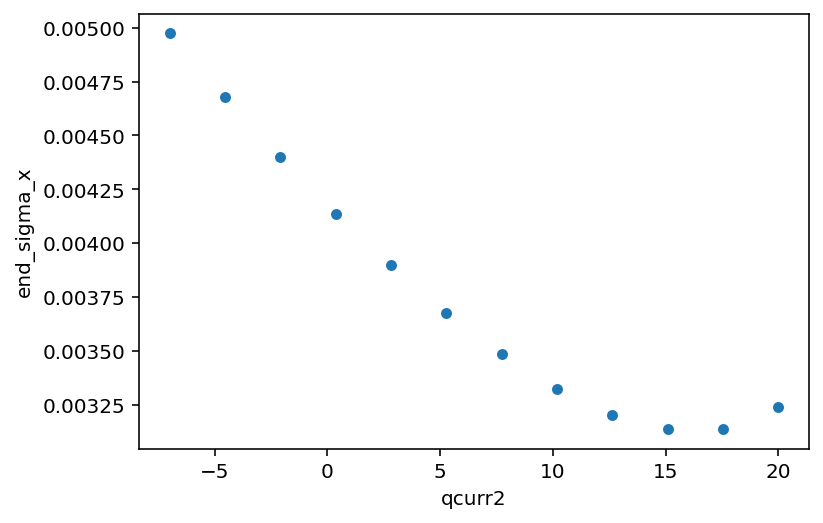

In [35]:
data.plot.scatter('qcurr2', 'end_sigma_x')

<AxesSubplot:xlabel='qcurr2', ylabel='end_n_particle'>

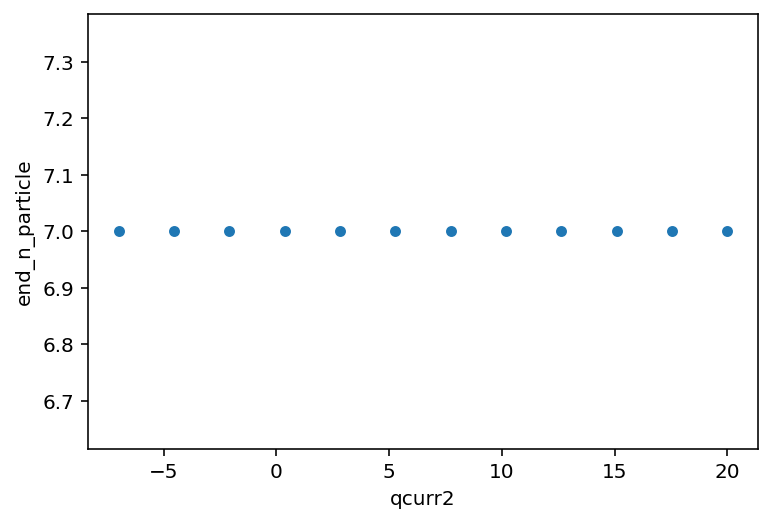

In [36]:
# Check particle loss
data.plot.scatter('qcurr2', 'end_n_particle')